## Importing essential libraries

In [26]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## Loading the Dataset

CIFAR-10

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [3]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 34s 0us/step


In [5]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [6]:
Y_train.shape, Y_test.shape

((50000, 1), (10000, 1))

In [9]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
Y_train = Y_train.reshape(-1,)

In [11]:
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
def plot_sample(X, Y, index): 
   plt.figure(figsize=(15,2))
   plt.imshow(X[index])
   plt.xlabel(classes[Y[index]])

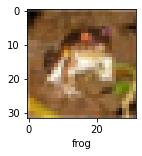

In [14]:
plot_sample(X_train, Y_train, 0)

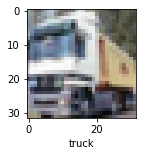

In [15]:
plot_sample(X_train, Y_train, 1)

## Normalizing out data
The pixel values can range from 0 to 256. Each number represents a color code. When using the image as it is and passing through a Deep Neural Network, the computation of high numeric values may become more complex. To reduce this we can normalize the values to range from 0 to 1. In this way, the numbers will be small and the computation becomes easier and faster. As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1.



In [16]:
X_train = X_train / 255
X_test = X_test / 255 

## First I will show you how Artificial Neural Network work with cifar10 dataset
So first we are building Artificial Neural Network Model(ANN)

In [17]:
ANN = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')
     ])

ANN.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ANN.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 115s 73ms/step - loss: 1.8105 - accuracy: 0.3547
Epoch 2/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.6243 - accuracy: 0.4279
Epoch 3/5
1563/1563 [==============================] - 112s 72ms/step - loss: 1.5434 - accuracy: 0.4550
Epoch 4/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.4834 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.4326 - accuracy: 0.4971


In [18]:
ANN.evaluate(X_test, Y_test)

313/313 [==============================] - 10s 31ms/step - loss: 1.4584 - accuracy: 0.4785


[1.4584294557571411, 0.47850000858306885]

## Classification report of ANN model

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
Y_pred = ANN.predict(X_test)
Y_pred_class = [np.argmax(element) for element in Y_pred]

print("Classification Report: \n", classification_report(Y_test,Y_pred_class))

313/313 [==============================] - 9s 30ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.47      0.53      1000
           1       0.69      0.47      0.56      1000
           2       0.36      0.35      0.36      1000
           3       0.43      0.19      0.27      1000
           4       0.33      0.59      0.42      1000
           5       0.41      0.38      0.40      1000
           6       0.55      0.46      0.50      1000
           7       0.53      0.57      0.55      1000
           8       0.50      0.74      0.60      1000
           9       0.56      0.56      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



## Now Building Convolution Neural Network (CNN)
 

In [28]:
CNN = models.Sequential([
          layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
          layers.MaxPooling2D((2,2)),

          layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
          layers.MaxPooling2D((2,2)),

          layers.Flatten(),
          layers.Dense(64,activation='relu'),
          layers.Dense(10,activation='softmax')
      ])

### Compiling the CNN model 

In [30]:
CNN.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [31]:
CNN.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 48s 29ms/step - loss: 1.4811 - accuracy: 0.4680
Epoch 2/10
1563/1563 [==============================] - 46s 30ms/step - loss: 1.1564 - accuracy: 0.5916
Epoch 3/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0412 - accuracy: 0.6339
Epoch 4/10
1563/1563 [==============================] - 48s 30ms/step - loss: 0.9701 - accuracy: 0.6603
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9112 - accuracy: 0.6826
Epoch 6/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8648 - accuracy: 0.6986
Epoch 7/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.8237 - accuracy: 0.7128
Epoch 8/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7882 - accuracy: 0.7249
Epoch 9/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7587 - accuracy: 0.7364
Epoch 10/10
1563/1563 [==============================] - 45s 29m

In [32]:
CNN.evaluate(X_test, Y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.9444 - accuracy: 0.6809


[0.9443970918655396, 0.680899977684021]

In [33]:
Y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [34]:
Y_test = Y_test.reshape(-1,)

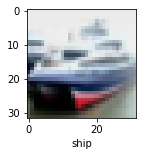

In [35]:
plot_sample(X_test, Y_test, 1)

In [37]:
Y_pred = CNN.predict(X_test)
Y_pred[:5]

313/313 [==============================] - 5s 14ms/step


array([[1.2290347e-02, 2.6005798e-03, 6.3350461e-03, 6.2893927e-01,
        5.0098955e-04, 2.6622114e-01, 7.2129801e-02, 3.7469799e-04,
        1.0217360e-02, 3.9071040e-04],
       [3.5538912e-02, 2.3270419e-01, 2.5273810e-05, 1.3302336e-04,
        3.1343434e-06, 1.3948388e-06, 2.5833353e-06, 8.3329788e-08,
        7.2898930e-01, 2.6021509e-03],
       [4.8108134e-02, 6.6299719e-01, 2.5697642e-03, 1.7467512e-02,
        6.4318255e-03, 2.6151096e-03, 1.5853078e-03, 2.6411330e-03,
        1.7351949e-01, 8.2064450e-02],
       [9.0349948e-01, 5.9284054e-04, 1.8548587e-02, 4.0317632e-04,
        1.6058490e-02, 4.1976095e-05, 7.3184776e-05, 9.2506816e-05,
        6.0554858e-02, 1.3494518e-04],
       [1.6539216e-06, 6.0799543e-05, 3.5095562e-03, 2.5704786e-02,
        1.7380758e-01, 1.2541941e-03, 7.9486847e-01, 3.4207915e-06,
        7.8906637e-04, 4.7158886e-07]], dtype=float32)

In [38]:
Y_classes = [np.argmax(element) for element in Y_pred]
Y_classes[:5]

[3, 8, 1, 0, 6]

In [39]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

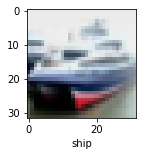

In [40]:
plot_sample(X_test, Y_test, 1)

In [42]:
classes[Y_classes[1]]

'ship'

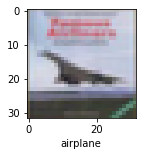

In [44]:
plot_sample(X_test, Y_test, 3)

In [45]:
classes[Y_classes[3]]

'airplane'

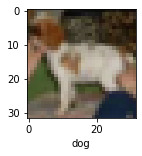

In [51]:
plot_sample(X_test, Y_test, 12)

In [52]:
classes[Y_classes[12]]

'bird'